In [109]:
from small_business import classification_model

ModuleNotFoundError: No module named 'small_business'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import googlemaps
from datetime import datetime
import os 
import folium

In [93]:
data=pd.read_csv('../small_business/data/restaurants.csv')
data=data.drop(columns='Unnamed: 0')

In [106]:
your_data=data[data['name'] == "Dear Breakfast"]['rating']

In [108]:
data[data['name'] == "Dear Breakfast"].type

572    brunch
Name: type, dtype: object

In [101]:
your_data

572    4.4
Name: rating, dtype: float64

In [27]:
reviews=pd.read_csv('../raw_data/reviews.csv')

In [65]:
from XX import XXX as model 

def predict_score(data, type_of_food, neighborhood, price):
    #putting the input in the right format
    new_X=pd.DataFrame(columns=['type','price','latitude','longitude', 'dine_in', 'takeaway','delivery', 'drive_through', 'curb_pickup', 'neighborhood'])
    new_row = {'type':type_of_food, 'price': price, 'latitude':'0','longitude':'0', 'takeaway':1,'dine_in':1,'delivery':1, 'drive_through':1, 'curb_pickup':1, 'neighborhood': neighborhood }
    new_X=new_X.append(new_row, ignore_index=True)
    y_predxgb = model.predict(pipe.transform(new_X))
    return y_predxgb 

ModuleNotFoundError: No module named 'XX'

In [24]:
### MAPPING 

def plot_map(data=data,lower_price=0 , higher_price=5 ,lowest_rating=0, best_rating=5, type_of_food=0, neighborhood=0): 
    data=pd.read_csv('../small_business/data/restaurants.csv')
    your_data=data.copy()
    your_data=data[data['price'] > lower_price]
    your_data=your_data[your_data['price'] <= higher_price ]
    your_data=your_data[your_data['rating'] >= lowest_rating]
    your_data=your_data[your_data['rating'] <= best_rating]
    
    if type_of_food==0:
        your_data=your_data
    else:
        your_data=your_data[your_data['type'] == type_of_food]
    
    if neighborhood==0:
        your_data=your_data
    else:
        your_data=your_data[your_data['neighborhood'] == neighborhood]
        
    data_use=your_data

    latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

    m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

    for coord in latlonname:
        folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

    return m

plot_map(data=data, type_of_food='fado')

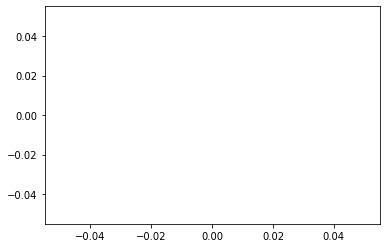

In [69]:
## EVOLUTION OF THE REVIEW SCORE 

def review_evolution(reviews, type_of_food=0, neighborhood=0, lower_price=0 , higher_price=5):
    reviews=reviews[reviews['price'] > lower_price]
    reviews=reviews[reviews['price'] <= higher_price ]
    
    if type_of_food==0:
        reviews=reviews
    else:
        reviews=reviews[reviews['type'] == type_of_food]
    
    if neighborhood==0:
        reviews=reviews
    else:
        reviews=reviews[reviews['neighborhood'] == neighborhood]
        
    reviews_to_plot=reviews.groupby('year').mean()
    
    return plt.plot(reviews_to_plot['comment_ratings'])

review_evolution(reviews)

In [75]:
## RECOMMENDATION IF WE KEEP THE TYPE: 
def best_neigh(data, type_of_food=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if type_of_food==0:
        data=data
    else:
        data=data[data['type'] == type_of_food]
    a= data.groupby('neighborhood').mean()
    return (pd.DataFrame(a.sort_values('rating', ascending=False).rating.head(3)))

def worse_neigh(data, type_of_food=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if type_of_food==0:
        data=data
    else:
        data=data[data['type'] == type_of_food]
    a= data.groupby('neighborhood').mean()
    print('rating: worse 3' , a.sort_values('rating', ascending=True).rating.head(3))

def best_price_range(data, type_of_food=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if type_of_food==0:
        data=data
    else:
        data=data[data['type'] == type_of_food]
    a= data.groupby('type').mean()
    print('rating: worse 3' , a.sort_values('price', ascending=True).rating.head(2))
    
## RECOMMENDATION IF WE KEEP THE NEIGHBORHOOD: 
def best_type(data, neighborhood=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if neighborhood==0:
        data=data
    else:
        data=data[data['neighborhood'] == neighborhood]
    a= data.groupby('type').mean()
    print('rating: worse 3' , a.sort_values('rating', ascending=False).rating.head(3))

def worse_type(data, neighborhood=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if neighborhood==0:
        data=data
    else:
        data=data[data['neighborhood'] == neighborhood]
    a= data.groupby('type').mean()
    print('rating: worse 3' , a.sort_values('rating', ascending=True).rating.head(3))
    

def best_price_range_neig(data, neighborhood=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if neighborhood==0:
        data=data
    else:
        data=data[data['neighborhood'] == neighborhood]
    a= data.groupby('neighborhood').mean()
    print('rating: worse 3' , a.sort_values('price', ascending=True).rating.head(3))

In [76]:
best_neigh(data)

,rating
neighborhood,
São Jorge de Arroios,4.800000
São Vicente de Fora,4.600000
Socorro,4.566667


## Overall data repartition

Text(0.5, 1.0, 'Number of restaurant per neighborhood')

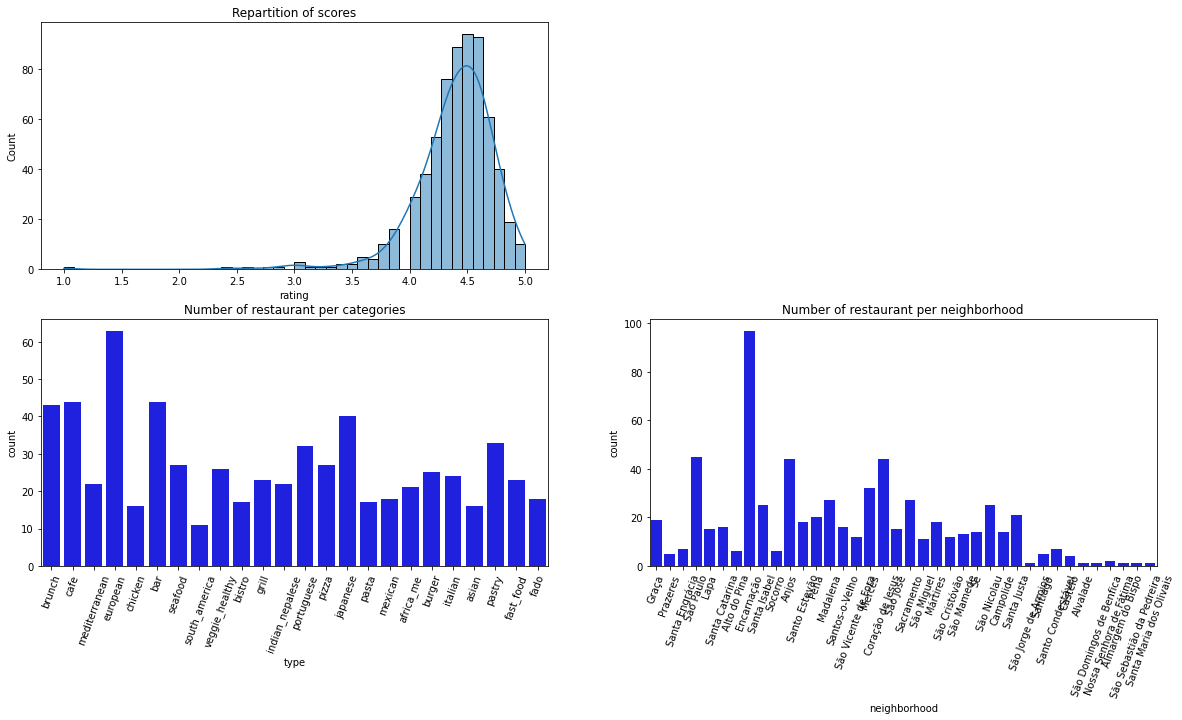

In [59]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(data=data, x='rating',kde= True)
plt.title('Repartition of scores')

plt.subplot(2,2,3)
sns.countplot(data.type, color='blue')
plt.xticks(rotation=70)
plt.title('Number of restaurant per categories')

plt.subplot(2,2,4)
sns.countplot(data.neighborhood, color='blue')
plt.xticks(rotation=70)
plt.title('Number of restaurant per neighborhood')

## More information about the type of food 

### Is the type of food impacting the review score? 

TypeError: 'list' object is not callable

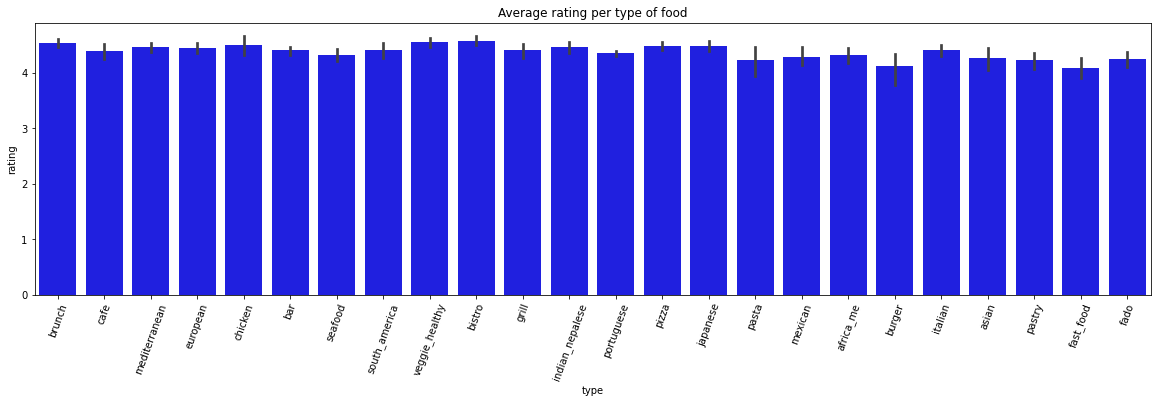

In [129]:
plt.figure(figsize=(20,5))

plt.title('Average rating per type of food')
sns.barplot(data.type, data.rating, color='blue')
plt.xticks(rotation=70)
plt.ylim([3,5])

In [102]:
a= data.groupby('type').mean()

In [103]:
print('rating: worse 3' , a.sort_values('rating', ascending=True).rating.head(3))

rating: worse 3 type
fast_food    4.095652
burger       4.132000
pastry       4.233333
Name: rating, dtype: float64


In [104]:
print('rating: best 3' , a.sort_values('rating', ascending=False).rating.head(3))

rating: best 3 type
bistro            4.576471
veggie_healthy    4.553846
brunch            4.537209
Name: rating, dtype: float64


###  Does the type of food impact the price of the meal? 

TypeError: 'list' object is not callable

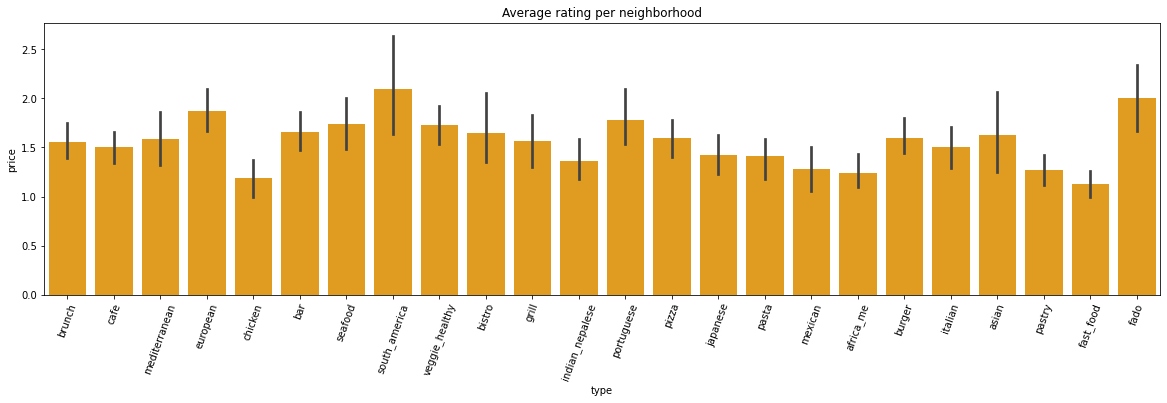

In [111]:
plt.figure(figsize=(20,5))

plt.title('Average rating per neighborhood')
sns.barplot(data.type, data.price, color='orange')
plt.xticks(rotation=70)
plt.ylim([3,5])

In [113]:
a= data.groupby('type').mean()

In [116]:
print('price: cheapest 3' , a.sort_values('price', ascending=True).price.head(3))

price: cheapest 3 type
fast_food    1.130435
chicken      1.187500
africa_me    1.238095
Name: price, dtype: float64


In [115]:
print('rating: most expensive 3' , a.sort_values('price', ascending=False).price.head(3))

rating: most expensive 3 type
south_america    2.090909
fado             2.000000
european         1.873016
Name: price, dtype: float64


### What type of restaurant have delivery, takeaway or curbpickup services ? 

In [118]:
a= data.groupby('type').mean()
a

,rating,review_count,price,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup
type,,,,,,,,,,,
africa_me,4.333333,410.809524,1.238095,38.716875,-9.138540,0.904762,0.809524,0.619048,0.000000,0.047619,0.095238
asian,4.275000,574.437500,1.625000,38.714302,-9.140115,1.000000,0.937500,0.562500,0.000000,0.062500,0.000000
bar,4.406818,811.318182,1.659091,38.713698,-9.143773,0.954545,0.477273,0.181818,0.000000,0.681818,0.045455
bistro,4.576471,272.000000,1.647059,38.713844,-9.141709,0.882353,0.823529,0.352941,0.000000,0.352941,0.058824
brunch,4.537209,593.767442,1.558140,38.715360,-9.143319,1.000000,0.860465,0.441860,0.000000,0.395349,0.093023
burger,4.132000,819.560000,1.600000,38.714803,-9.143871,0.960000,0.880000,0.560000,0.000000,0.200000,0.080000
cafe,4.390909,823.159091,1.500000,38.714749,-9.142775,0.909091,0.704545,0.272727,0.045455,0.477273,0.045455
chicken,4.500000,683.000000,1.187500,38.713235,-9.142520,0.937500,0.812500,0.375000,0.000000,0.187500,0.062500
european,4.455556,478.111111,1.873016,38.713007,-9.144329,0.904762,0.682540,0.190476,0.031746,0.555556,0.031746


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'brunch'),
  Text(1, 0, 'cafe'),
  Text(2, 0, 'mediterranean'),
  Text(3, 0, 'european'),
  Text(4, 0, 'chicken'),
  Text(5, 0, 'bar'),
  Text(6, 0, 'seafood'),
  Text(7, 0, 'south_america'),
  Text(8, 0, 'veggie_healthy'),
  Text(9, 0, 'bistro'),
  Text(10, 0, 'grill'),
  Text(11, 0, 'indian_nepalese'),
  Text(12, 0, 'portuguese'),
  Text(13, 0, 'pizza'),
  Text(14, 0, 'japanese'),
  Text(15, 0, 'pasta'),
  Text(16, 0, 'mexican'),
  Text(17, 0, 'africa_me'),
  Text(18, 0, 'burger'),
  Text(19, 0, 'italian'),
  Text(20, 0, 'asian'),
  Text(21, 0, 'pastry'),
  Text(22, 0, 'fast_food'),
  Text(23, 0, 'fado')])

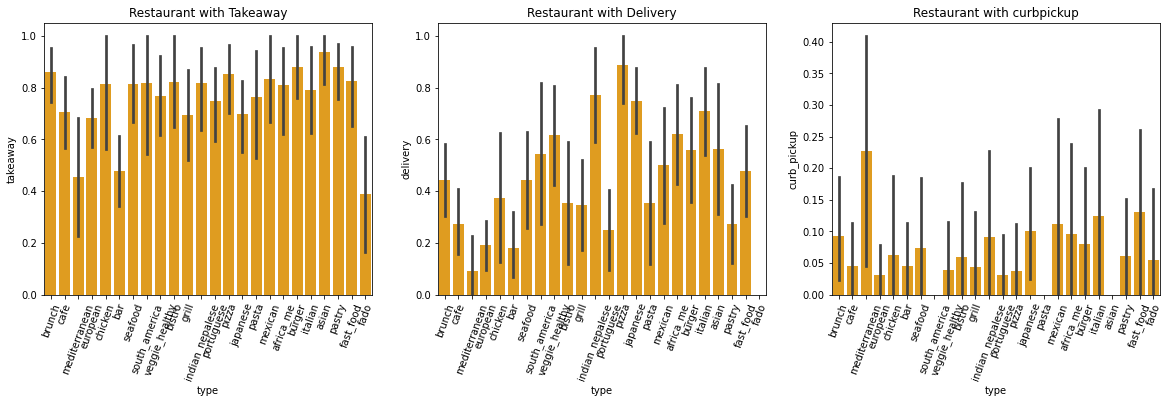

In [128]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Restaurant with Takeaway')
sns.barplot(data.type, data.takeaway, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

plt.subplot(1,3,2)
plt.title('Restaurant with Delivery')
sns.barplot(data.type, data.delivery, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

plt.subplot(1,3,3)
plt.title('Restaurant with curbpickup')
sns.barplot(data.type, data.curb_pickup, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

## More information about the Neighborhoods 

### Is the neighborhoods impacting the review score? 

TypeError: 'list' object is not callable

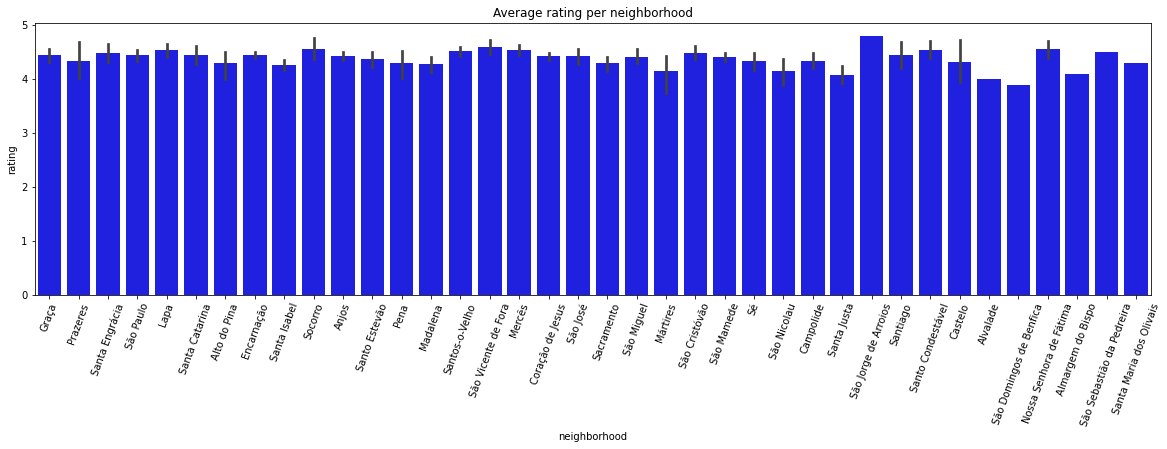

In [130]:
plt.figure(figsize=(20,5))

plt.title('Average rating per neighborhood')
sns.barplot(data.neighborhood, data.rating, color='blue')
plt.xticks(rotation=70)
plt.ylim([3,5])

In [140]:
a= data.groupby('neighborhood').mean()

In [141]:
print('rating: worse 3' , a.sort_values('rating', ascending=True).rating.head(3))

rating: worse 3 neighborhood
São Domingos de Benfica    3.900000
Alvalade                   4.000000
Santa Justa                4.080952
Name: rating, dtype: float64


In [142]:
print('rating: best 3' , a.sort_values('rating', ascending=False).rating.head(3))

rating: best 3 neighborhood
São Jorge de Arroios    4.800000
São Vicente de Fora     4.600000
Socorro                 4.566667
Name: rating, dtype: float64


###  Does the neighborhood impact the price of the meal? 

TypeError: 'list' object is not callable

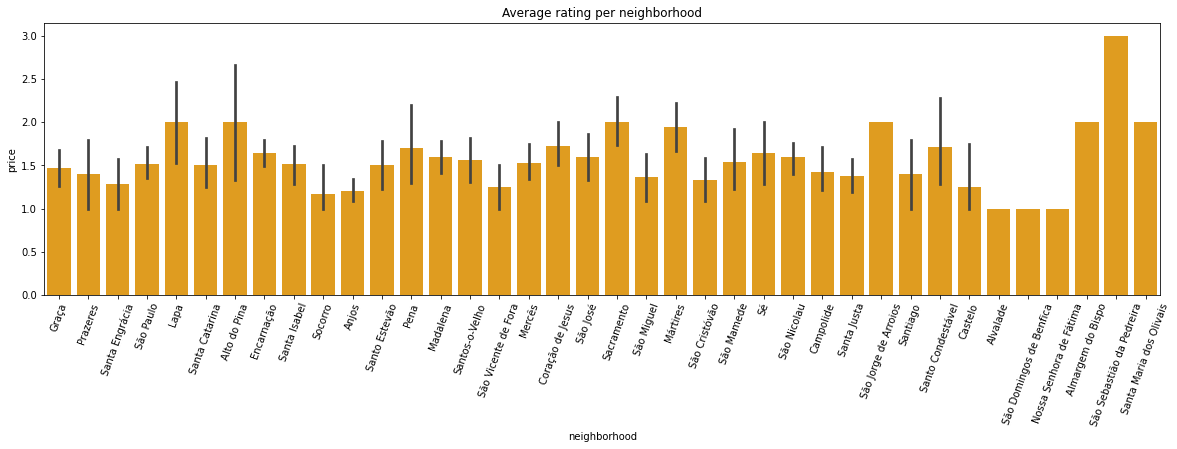

In [143]:
plt.figure(figsize=(20,5))

plt.title('Average rating per neighborhood')
sns.barplot(data.neighborhood, data.price, color='orange')
plt.xticks(rotation=70)
plt.ylim([3,5])

In [151]:
a= data.groupby('neighborhood').mean()


In [152]:
print('price: cheapest 3' , a.sort_values('price', ascending=True).price.head(3))
## ATTENTION= not representative number of restaurant per neighnb. 

price: cheapest 3 neighborhood
São Domingos de Benfica    1.0
Alvalade                   1.0
Nossa Senhora de Fátima    1.0
Name: price, dtype: float64


In [153]:
print('rating: most expensive 3' , a.sort_values('price', ascending=False).price.head(3))

rating: most expensive 3 neighborhood
São Sebastião da Pedreira    3.0
Almargem do Bispo            2.0
São Jorge de Arroios         2.0
Name: price, dtype: float64


### What type of neighborhood have delivery, takeaway or curbpickup services ? 

In [157]:
a= data.groupby('neighborhood').mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Graça'),
  Text(1, 0, 'Prazeres'),
  Text(2, 0, 'Santa Engrácia'),
  Text(3, 0, 'São Paulo'),
  Text(4, 0, 'Lapa'),
  Text(5, 0, 'Santa Catarina'),
  Text(6, 0, 'Alto do Pina'),
  Text(7, 0, 'Encarnação'),
  Text(8, 0, 'Santa Isabel'),
  Text(9, 0, 'Socorro'),
  Text(10, 0, 'Anjos'),
  Text(11, 0, 'Santo Estevão'),
  Text(12, 0, 'Pena'),
  Text(13, 0, 'Madalena'),
  Text(14, 0, 'Santos-o-Velho'),
  Text(15, 0, 'São Vicente de Fora'),
  Text(16, 0, 'Mercês'),
  Text(17, 0, 'Coração de Jesus'),
  Text(18, 0, 'São José'),
  Text(19, 0, 'Sacramento'),
  Text(20, 0, 'São Miguel'),
  Text(21, 0, 'Mártires'),
  Text(22, 0, 'São Cristóvão'),
  Text(23, 0, 'São Mamede'),
  Text(24, 0, 'Sé'),
  Text(25, 0, 'São Nicolau'),
  Text(26, 0, 'Campolide'),
  Text(27, 0, 'Santa Justa'),
  Text(28, 0, 'São Jorge de 

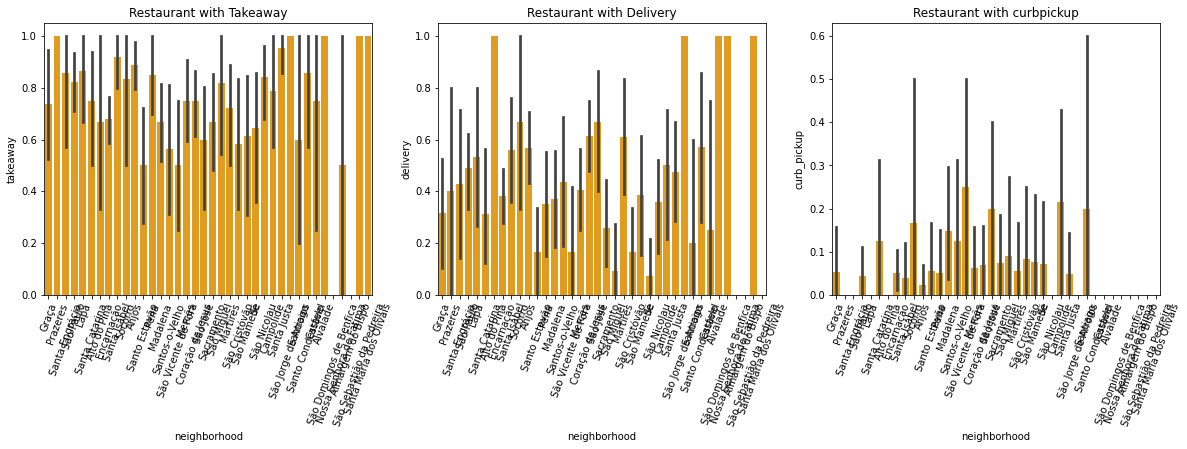

In [158]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Restaurant with Takeaway')
sns.barplot(data.neighborhood, data.takeaway, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

plt.subplot(1,3,2)
plt.title('Restaurant with Delivery')
sns.barplot(data.neighborhood, data.delivery, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

plt.subplot(1,3,3)
plt.title('Restaurant with curbpickup')
sns.barplot(data.neighborhood, data.curb_pickup, color='orange')
plt.xticks(rotation=70)
#plt.ylim([3,5])

## Do restaurant with several services perform better? 

In [17]:
data23=data.groupby('takeaway').mean()
data23

,rating,review_count,price,dine_in,delivery,drive_through,no_del_exp,curb_pickup
takeaway,,,,,,,,
0,4.443114,692.299401,1.598802,0.802395,0.311377,0.101796,0.395210,0.263473
1,4.372577,730.975258,1.558763,0.993814,0.457732,0.000000,0.327835,0.000000


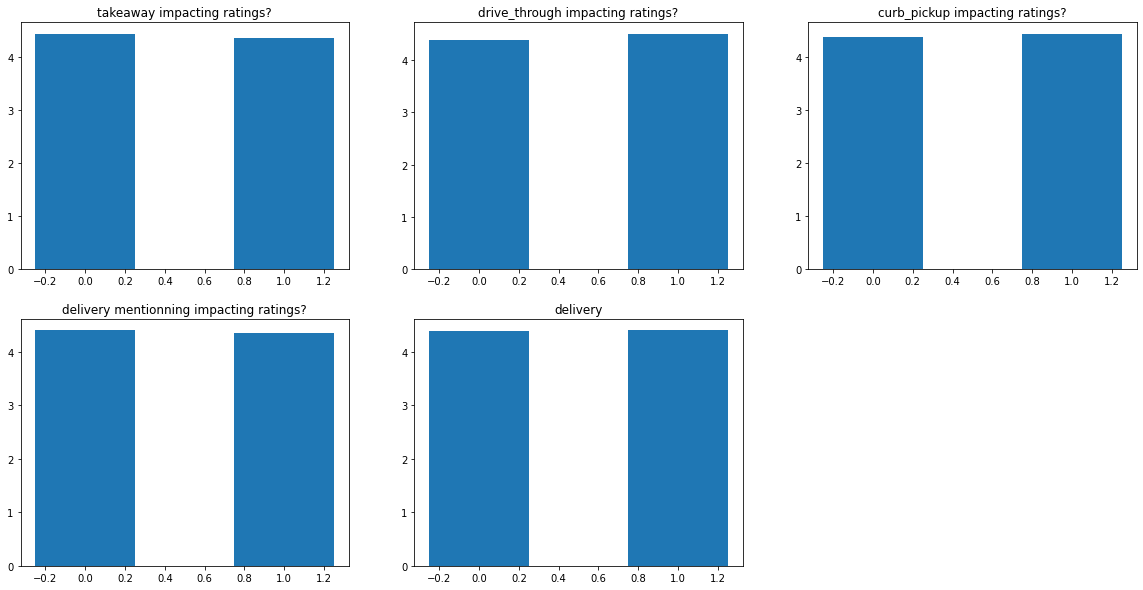

In [160]:
plt.figure(figsize=(20,10))

# takeaway
data23=data.groupby('takeaway').mean()
plt.subplot(2,3,1)
plt.title('takeaway impacting ratings?')
plt.bar(x= (0,1), height=data23.rating, width=0.5)
#plt.ylim=[4,5]

# drive_through
data24=data.groupby('drive_through').mean()
plt.subplot(2,3,2)
plt.title('drive_through impacting ratings?')
plt.bar(x= (0,1), height=data24.rating, width=0.5)
#plt.ylim=[4,5]

# curb_pickup
data25=data.groupby('curb_pickup').mean()
plt.subplot(2,3,3)
plt.title('curb_pickup impacting ratings?')
plt.bar(x= (0,1), height=data25.rating, width=0.5)
#plt.ylim=[4,5]

# Restaurant explicitely mentinning no delivery
data26=data.groupby('no_del_exp').mean()
plt.subplot(2,3,4)
plt.title('delivery mentionning impacting ratings?')
plt.bar(x= (0,1), height=data26.rating, width=0.5)
#plt.ylim=[4,5]

# delivery
data27=data.groupby('delivery').mean()
plt.subplot(2,3,5)
plt.title('delivery')
plt.bar(x= (0,1), height=data27.rating, width=0.5)
plt.ylim=[4,5]

## Vizualization of the repartition with a map

### Overall vizualization of all the restaurants

In [162]:
latlonname= zip(data['latitude'],data['longitude'], data['name'], data['price'], data['rating'], data['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma

### Several examples

#### Map of the best restaurant in Graca with a price inferior to 2 

In [167]:
data_highprice=data[data['price'] > 2]
data_lowprice=data[data['price'] < 2]
data_graca=data[data['neighborhood'] == 'Graça']
best_restaurant_graca=data_graca[data['rating'] >=4.6]
#best_restaurant_graca

In [168]:
data_use=best_restaurant_graca

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m

#### Map of the worse fast foods in Lisbon 

In [190]:
data_fast_food=data[data['type'] == 'fast_food']
data_worse_fast_food=data_fast_food[data_fast_food['rating']<4]

In [191]:
data_use=data_worse_fast_food

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m

In [164]:
#### Map of the best restaurant in Graca with a price inferior to 2 

data_highprice=data[data['price'] > 2]
data_lowprice=data[data['price'] < 2]
data_graca=data[data['neighborhood'] == 'Graça']
best_restaurant_graca=data_graca[data['rating'] >=4.6]
#best_restaurant_graca

data_use=best_restaurant_graca

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m

your_data=data.copy()
your_data=data[data['price'] > lower_price]
your_data=your_data[your_data['price'] < higher_price]
your_data=your_data[your_data['neighborhood'] == neighborhood]
your_data=your_data[your_data['type'] == type_of_food]
your_data=your_data[your_data['rating'] > worse_rating]
your_data=your_data[your_data['rating'] < best_rating]


NameError: name 'lower_price' is not defined

### Draft your own map 

In [192]:
data.neighborhood.unique()

array(['Graça', 'Prazeres', 'Santa Engrácia', 'São Paulo', 'Lapa',
       'Santa Catarina', 'Alto do Pina', 'Encarnação', 'Santa Isabel',
       'Socorro', 'Anjos', 'Santo Estevão', 'Pena', 'Madalena',
       'Santos-o-Velho', 'São Vicente de Fora', 'Mercês',
       'Coração de Jesus', 'São José', 'Sacramento', 'São Miguel',
       'Mártires', 'São Cristóvão', 'São Mamede', 'Sé', 'São Nicolau',
       'Campolide', nan, 'Santa Justa', 'São Jorge de Arroios',
       'Santiago', 'Santo Condestável', 'Castelo', 'Alvalade',
       'São Domingos de Benfica', 'Nossa Senhora de Fátima',
       'Almargem do Bispo', 'São Sebastião da Pedreira',
       'Santa Maria dos Olivais'], dtype=object)

In [234]:
## Select the criteria you want to plot by selecting the data

#select a neighborood whithin the list : 'Graça', 'Prazeres', 'Santa Engrácia', 'São Paulo', 'Lapa', 'Santa Catarina', 'Alto do Pina', 'Encarnação', 'Santa Isabel', 'Socorro', 'Anjos', 'Santo Estevão', 'Pena', 'Madalena', 'Santos-o-Velho', 'São Vicente de Fora', 'Mercês','Coração de Jesus', 'São José', 'Sacramento', 'São Miguel','Mártires', 'São Cristóvão', 'São Mamede', 'Sé', 'São Nicolau','Campolide', nan, 'Santa Justa', 'São Jorge de Arroios','Santiago', 'Santo Condestável', 'Castelo', 'Alvalade','São Domingos de Benfica', 'Nossa Senhora de Fátima','Almargem do Bispo', 'São Sebastião da Pedreira','Santa Maria dos Olivais'
neighborhood='Encarnação'
lower_price=0 #select the lowest price and
higher_price=5 #select the highest price
worse_rating=0 #select worse rating and
best_rating =5 #select best rating
type_of_food= 'portuguese' #select a type of food whithin the list 

In [235]:
your_data=data.copy()
your_data=data[data['price'] > lower_price]
your_data=your_data[your_data['price'] < higher_price ]
your_data=your_data[your_data['neighborhood'] == neighborhood]
your_data=your_data[your_data['rating'] >= worse_rating]
your_data=your_data[your_data['rating'] <= best_rating]
your_data=your_data[your_data['type'] == type_of_food]

In [236]:
data_use=your_data

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma

## OUT

### information about neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Graça'),
  Text(1, 0, 'Prazeres'),
  Text(2, 0, 'Santa Engrácia'),
  Text(3, 0, 'São Paulo'),
  Text(4, 0, 'Lapa'),
  Text(5, 0, 'Santa Catarina'),
  Text(6, 0, 'Alto do Pina'),
  Text(7, 0, 'Encarnação'),
  Text(8, 0, 'Santa Isabel'),
  Text(9, 0, 'Socorro'),
  Text(10, 0, 'Anjos'),
  Text(11, 0, 'Santo Estevão'),
  Text(12, 0, 'Pena'),
  Text(13, 0, 'Madalena'),
  Text(14, 0, 'Santos-o-Velho'),
  Text(15, 0, 'São Vicente de Fora'),
  Text(16, 0, 'Mercês'),
  Text(17, 0, 'Coração de Jesus'),
  Text(18, 0, 'São José'),
  Text(19, 0, 'Sacramento'),
  Text(20, 0, 'São Miguel'),
  Text(21, 0, 'Mártires'),
  Text(22, 0, 'São Cristóvão'),
  Text(23, 0, 'São Mamede'),
  Text(24, 0, 'Sé'),
  Text(25, 0, 'São Nicolau'),
  Text(26, 0, 'Campolide'),
  Text(27, 0, 'Santa Justa'),
  Text(28, 0, 'São Jorge de 

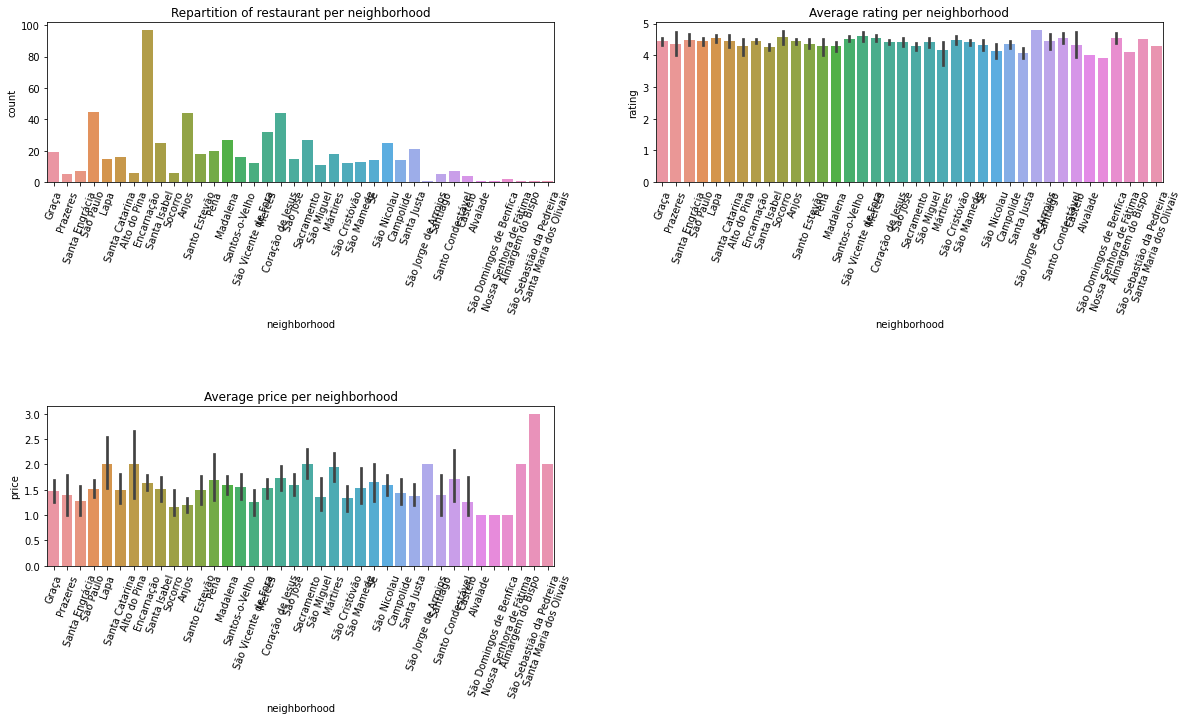

In [159]:
plt.figure(figsize=(20,10))

# Repartition of restaurant per neighborhood
plt.subplot(3,2,1)
plt.title('Repartition of restaurant per neighborhood')
sns.countplot(data.neighborhood)
plt.xticks(rotation=70)

# Average rating per neighborhood 
plt.subplot(3,2,2)
plt.title('Average rating per neighborhood')
sns.barplot(data.neighborhood, data.rating)
plt.xticks(rotation=70)
#plt.ylim([3,5])
# Average price per neighborhood 
plt.subplot(3,2,5)
plt.title('Average price per neighborhood')
sns.barplot(data.neighborhood, data.price)
plt.xticks(rotation=70)

### Correlation and pairplot

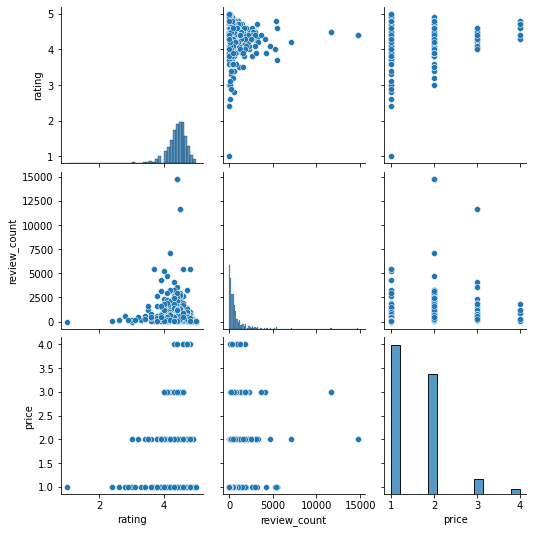

In [14]:
sns.pairplot(data[['rating', 'review_count', 'price']])

In [35]:
exct1=data[['neighborhood','takeaway', 'delivery', 'drive_through', 'curb_pickup']].groupby('neighborhood').mean()
exct1

,takeaway,delivery,drive_through,curb_pickup
neighborhood,,,,
Almargem do Bispo,0.000000,0.000000,0.000000,0.000000
Alto do Pina,0.666667,1.000000,0.333333,0.000000
Alvalade,1.000000,1.000000,0.000000,0.000000
Anjos,0.886364,0.568182,0.000000,0.022727
Campolide,0.785714,0.500000,0.000000,0.214286
Castelo,0.750000,0.250000,0.000000,0.000000
Coração de Jesus,0.750000,0.613636,0.068182,0.068182
Encarnação,0.680412,0.381443,0.020619,0.051546
Graça,0.736842,0.315789,0.052632,0.052632


In [67]:
review_evolution(reviews)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [74]:
best_neigh(data=data, type_of_food='pizza')

rating: worse 3 neighborhood
São Paulo              4.7
Mercês                 4.6
São Vicente de Fora    4.6
Name: rating, dtype: float64


In [77]:
def best_price_range(data, type_of_food=0):
    data=pd.read_csv('../small_business/data/restaurants.csv')
    if type_of_food==0:
        data=data
    else:
        data=data[data['type'] == type_of_food]
    a= data.groupby('type').mean()
    print('rating: worse 3' , a.sort_values('price', ascending=True).rating.head(2))

In [84]:
data2=data[data['type'] == 'pizza']
data2


,name,type,rating,review_count,price,address,label,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
48,Coppola,pizza,4.9,89.0,2,"Praça das Flores 56, 1200-250 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",38.715220,-9.151211,1,1,1,0,0,0,1200-250,Lisboa,Mercês
73,M’arrecreo Pizzeria,pizza,4.7,528.0,2,"R. de São Pedro de Alcântara 35, 1200-270 Lisb...","['dine-in', 'delivery']",38.713975,-9.144031,1,0,1,0,0,0,1200-270,Lisboa,Encarnação
84,Pizzeria Romana BIO,pizza,4.6,845.0,1,"R. de São João da Praça 75, 1100-519 Lisboa, P...","['dine-in', 'curbside pickup', 'no-contact del...",38.709555,-9.130753,1,0,1,0,0,1,1100-519,Lisboa,Sé
101,Pizzaria Luzzo,pizza,4.4,1384.0,2,"R. de Santa Marta 37A C, 1150-005 Lisboa, Port...","['dine-in', 'takeaway', 'delivery']",38.723424,-9.145881,1,1,1,0,0,0,1150-005,Lisboa,Coração de Jesus
152,Simplesmente Pizza Bar,pizza,4.5,398.0,2,"R. da Atalaia nº108, 1200-043 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",38.712646,-9.144985,1,1,1,0,0,0,1200-043,Lisboa,Encarnação
183,Pizzaria Lisboa,pizza,4.4,1152.0,2,"R. Nova da Trindade 18, 1200-235 Lisboa, Portugal","['dine-in', 'takeaway']",38.712265,-9.142378,1,1,0,0,0,0,1200-235,Lisboa,Sacramento
216,Casanova,pizza,4.5,2936.0,2,"Av. Infante Dom Henrique Loja 7, 1900-264 Lisboa","['dine-in', 'takeaway', 'delivery']",38.719719,-9.115766,1,1,1,0,0,0,1900-264,Lisboa,Santa Engrácia
223,In Bocca Al Lupo,pizza,4.3,528.0,2,"R. Manuel Bernardes 5, 1200-009 Lisboa, Portugal","['dine-in', 'takeaway', 'no-contact delivery']",38.714957,-9.152335,1,1,1,0,0,0,1200-009,Lisboa,Mercês
273,Valdo Gatti Pizza Bio,pizza,4.7,1205.0,2,"R. do Gremio Lusitano 13, 1200-211 Lisboa, Por...","['dine-in', 'takeaway', 'delivery']",38.713376,-9.144140,1,1,1,0,0,0,1200-211,Lisboa,Encarnação
287,Pizzeria Romana al Taglio,pizza,4.5,759.0,1,"Rua da Conceição 44, 1100-154 Lisboa, Portugal","['dine-in', 'drive-through', 'no-contact deliv...",38.709888,-9.136305,1,0,1,1,0,0,1100-154,Lisboa,Madalena


In [83]:
a

,rating,review_count,price,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup
type,,,,,,,,,,,
pizza,4.485185,751.703704,1.592593,38.71605,-9.139931,0.962963,0.851852,0.888889,0.037037,0.037037,0.037037


In [90]:
data=data[data['type'] == 'pizza']
a= data.groupby('neighborhood').mean()
pd.DataFrame(a.sort_values('rating', ascending=False).price.head(1))

,price
neighborhood,
São Paulo,1.333333


array(['pizza'], dtype=object)